## **The Sparks Foundation : Data Science & Business Analytics Intern**



# Task 2: Prediction using Unsupervised ML

Objective: From the given "iris" dataset, predict the optimum number of clusters and represent it visually

Level = Beginner

Author:

IDE = Google colab


# DATA PREPROCESSING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_inline
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('/content/Iris.csv')
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.shape

(150, 6)

In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
iris_outcome = pd.crosstab(index=df["Species"], columns="count")
iris_outcome

col_0,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [8]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# EXPLORATORY DATA ANALYSIS

<Axes: xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

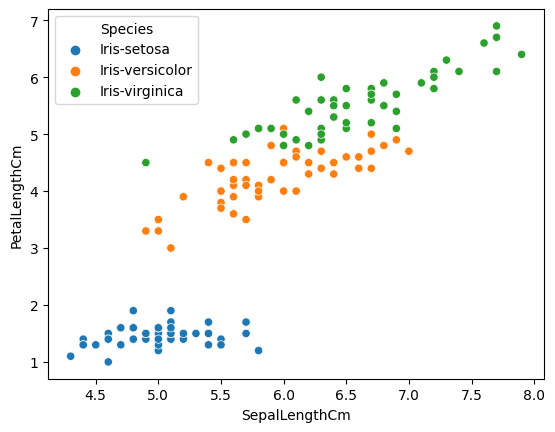

In [9]:
sns.scatterplot(x='SepalLengthCm',y='PetalLengthCm',data=df,hue='Species')

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

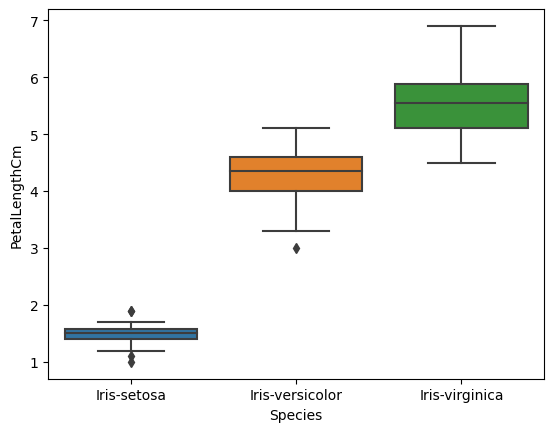

In [10]:
sns.boxplot(x='Species',y='PetalLengthCm',data=df)

<ipython-input-11-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

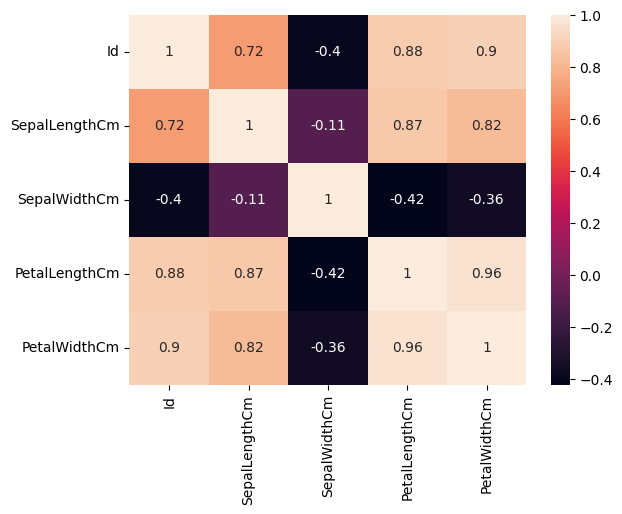

In [11]:
sns.heatmap(df.corr(),annot=True)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


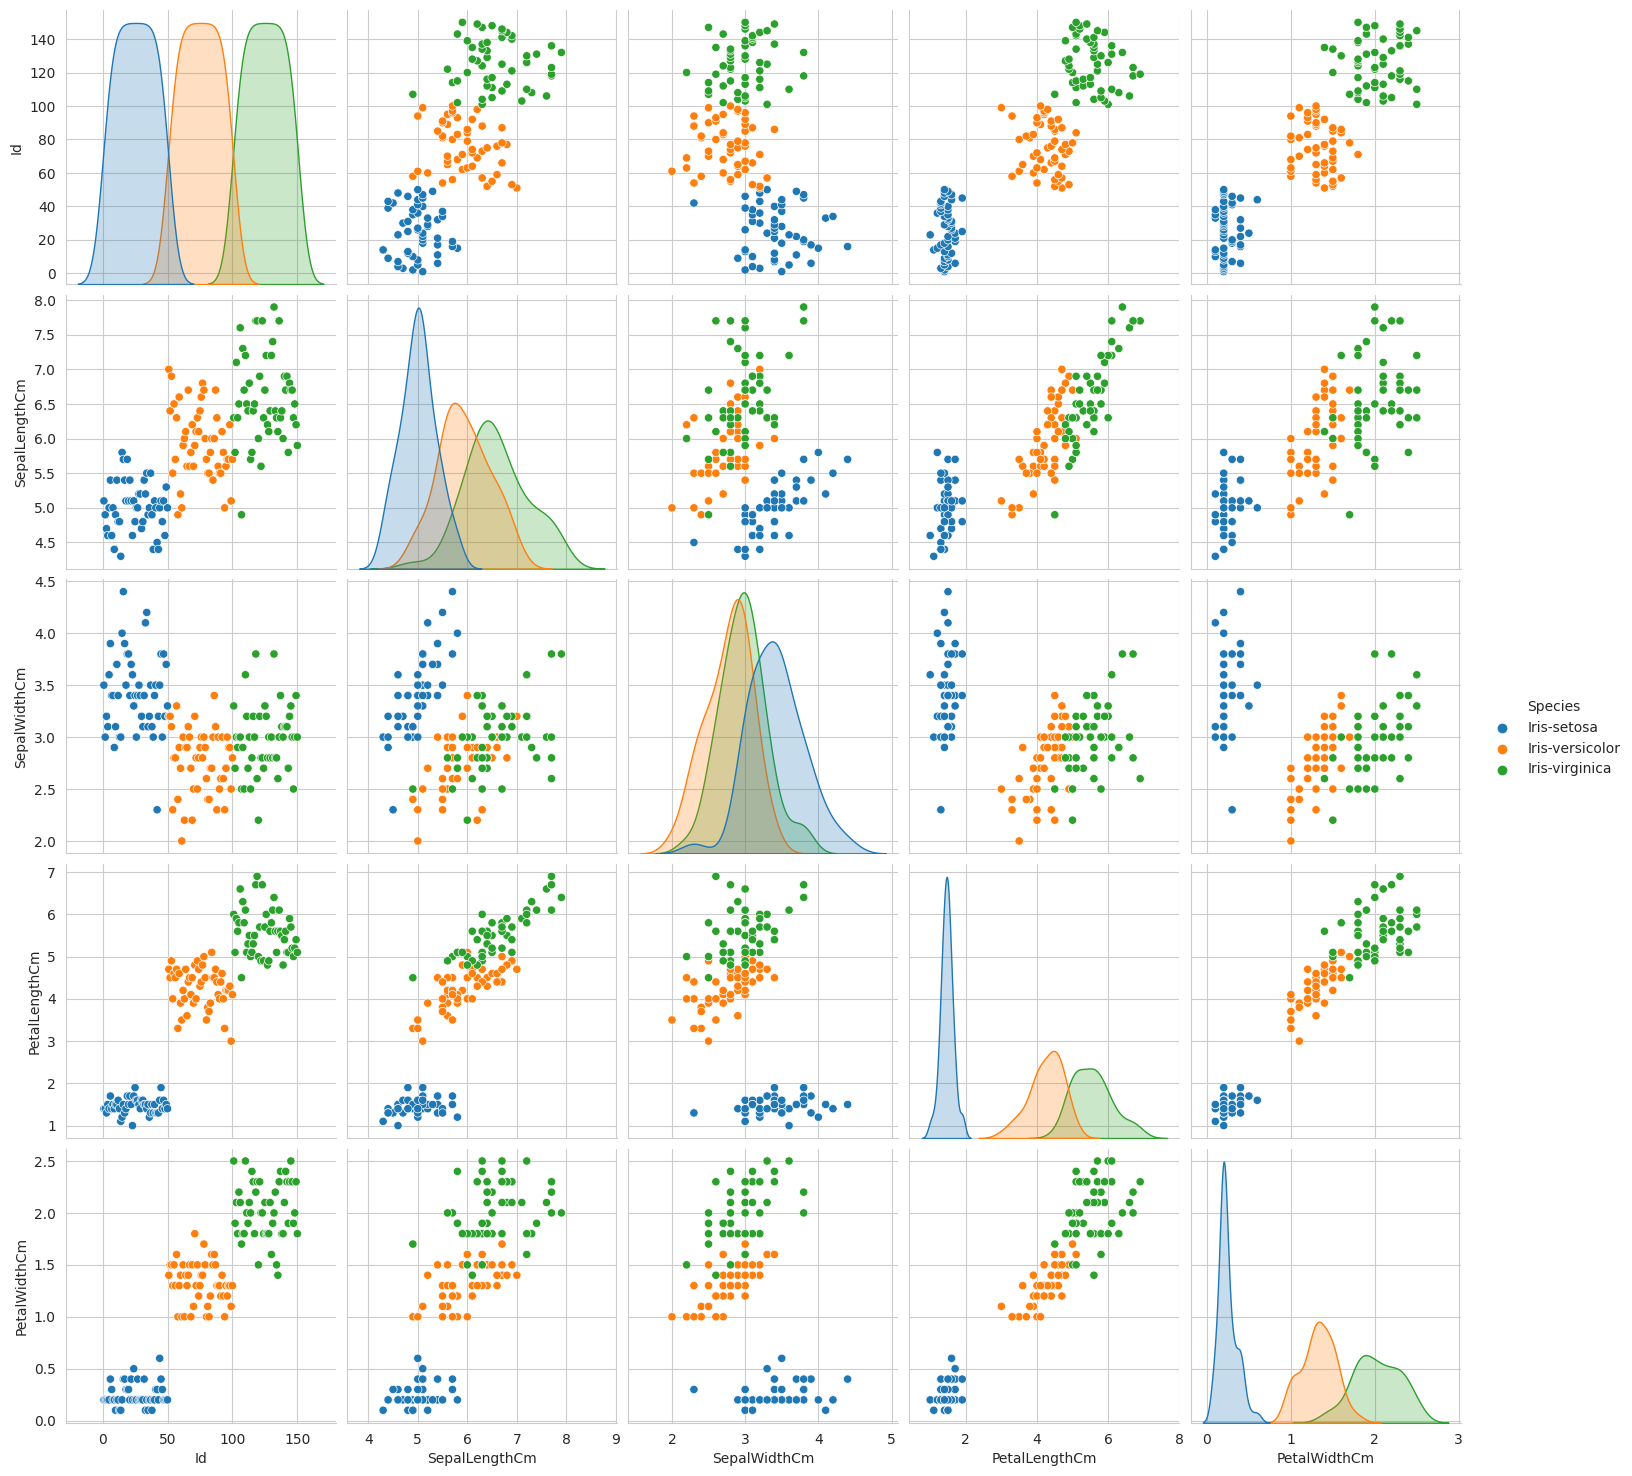

In [12]:
sns.set_style('whitegrid')
sns.pairplot(df,hue='Species',size=3)
plt.show()

# MODEL BUILDIND

In [13]:
x = df.iloc[:,[0,1,2,3]].values
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++',
                  max_iter = 300 ,n_init = 10, random_state =0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

# Using Elbow graph to find optimum no.of Clusters

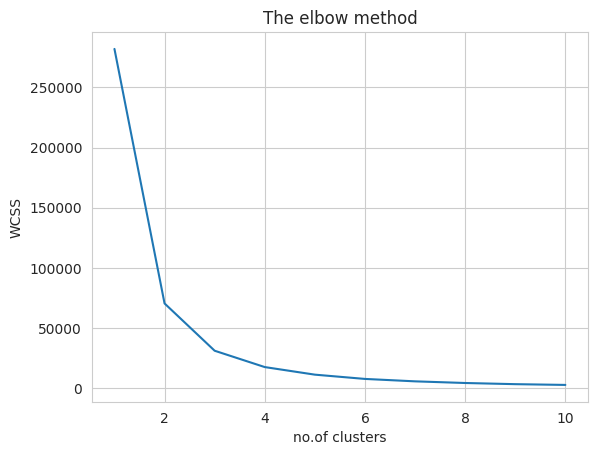

In [14]:
plt.plot(range(1,11), wcss)
plt.title('The elbow method')
plt.xlabel('no.of clusters')
plt.ylabel('WCSS')
plt.show()

# Creating K-Means Classifier

In [15]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300 ,n_init = 10, random_state =0)
y_kmeans = kmeans.fit_predict(x)

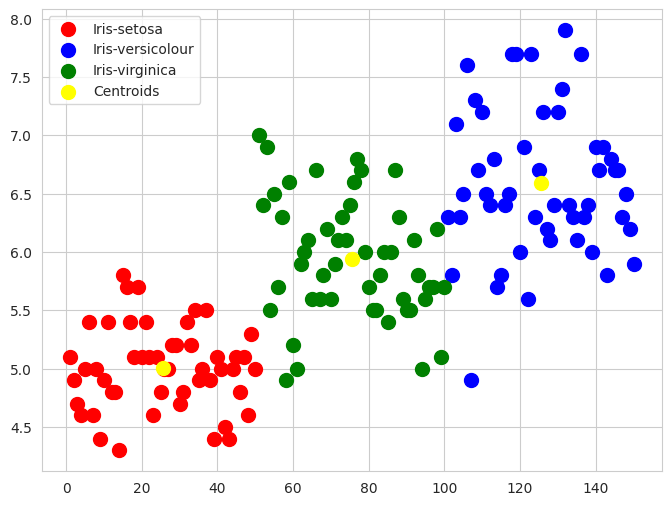

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(x[y_kmeans == 0, 0],x[y_kmeans == 0, 1],s=100, c='red',label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0],x[y_kmeans == 1, 1],s=100, c='blue',label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0],x[y_kmeans == 2, 1],s=100, c='green',label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s=100, c='yellow',label = 'Centroids')

plt.legend()

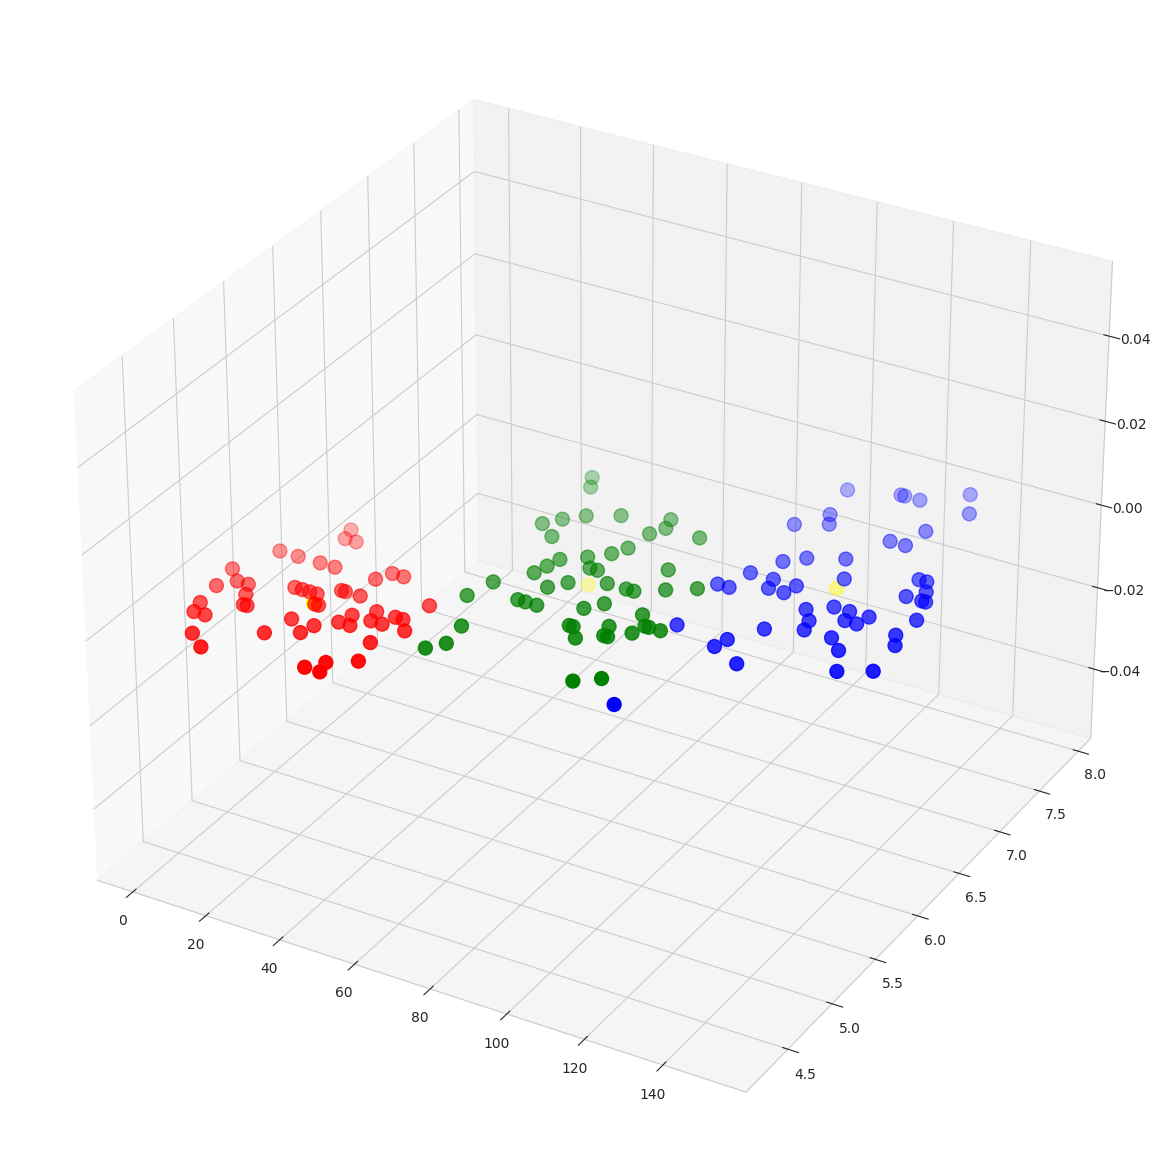

In [17]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection ='3d')
plt.scatter(x[y_kmeans == 0, 0],x[y_kmeans == 0, 1],s=100, c='red',label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0],x[y_kmeans == 1, 1],s=100, c='blue',label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0],x[y_kmeans == 2, 1],s=100, c='green',label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s=100, c='yellow',label = 'Centroids')
plt.show()

Thank You